In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.ops import*
import sklearn 

In [ ]:
from google.colab import files

uploaded = files.upload()
col_names = ['SKU_number', 'PriceReg', 'ItemCount', 'File_Type',
       'AddCost', 'RunCumCost', 'TotSum', 'RunPerc', 'Class', 'demand1',
       'demand2', 'demand3', 'Rate1', 'Rate2',
       'Rate3', 'Sum_rate', 'Final_rate',
       'Com_Class', 'label']
df = pd.read_csv("Xtrain.csv", names= col_names, header = 0, dtype={'SKU_number':float, 'PriceReg': float, 'ItemCount': float, 'File_Type': str,
       'AddCost': float, 'RunCumCost': float, 'TotSum':float, 'RunPerc':float, 'Class':str, 'demand1':float,
       'demand2':float, 'demand3':float, 'Rate1': str, 'Rate2':str,
       'Rate3': str, 'Sum_rate': str, 'Final_rate': str,
       'Com_Class': str, 'label': str})
df.head()

Saving Xtrain.csv to Xtrain (2).csv


,SKU_number,PriceReg,ItemCount,File_Type,AddCost,RunCumCost,TotSum,RunPerc,Class,demand1,demand2,demand3,Rate1,Rate2,Rate3,Sum_rate,Final_rate,Com_Class,label
0,875120.0,23.97,17.0,Historical,407.49,3.422573e+08,3.426319e+08,0.998907,C,7057.0,1060.0,9685.0,M,R,F,MRF,Seasonal,C/Seasonal,14
1,58149.0,126.95,56.0,Historical,7109.20,1.819644e+08,3.426319e+08,0.531078,A,12944.0,5853.0,9984.0,FF,M,F,FFMF,F,A/F,3
2,169665.0,283.95,45.0,Historical,12777.75,1.115342e+08,3.426319e+08,0.325522,A,14649.0,13681.0,1029.0,FF,FF,R,FFFFR,Seasonal,A/Seasonal,12
3,893259.0,40.00,16.0,Historical,640.00,3.409839e+08,3.426319e+08,0.995190,C,3172.0,13338.0,12836.0,R,FF,FF,RFFFF,Seasonal,C/Seasonal,14
4,528405.0,130.67,45.0,Historical,5880.15,2.042275e+08,3.426319e+08,0.596055,A,7198.0,8855.0,4876.0,M,F,M,MFM,M,A/M,6


In [ ]:
uploaded = files.upload()
test_df = pd.read_csv("Xtest.csv", names= col_names, header = 0, dtype={'SKU_number':float, 'PriceReg': float, 'ItemCount': float, 'File_Type': str,
       'AddCost': float, 'RunCumCost': float, 'TotSum':float, 'RunPerc':float, 'Class':str, 'demand1':float,
       'demand2':float, 'demand3':float, 'Rate1': str, 'Rate2':str,
       'Rate3': str, 'Sum_rate': str, 'Final_rate': str,
       'Com_Class': str, 'label': str})

Saving Xtest.csv to Xtest (2).csv


In [ ]:
train_df = df.drop(columns= ['SKU_number','File_Type',
       'AddCost', 'RunCumCost', 'TotSum', 'RunPerc','Rate1', 'Rate2',
       'Rate3', 'Sum_rate', 'Final_rate',
       'Com_Class', 'Class'])

In [ ]:
test_df = test_df.drop(columns=['SKU_number','File_Type',
       'AddCost', 'RunCumCost', 'TotSum', 'RunPerc','Rate1', 'Rate2',
       'Rate3', 'Sum_rate', 'Final_rate',
       'Com_Class', 'Class'])

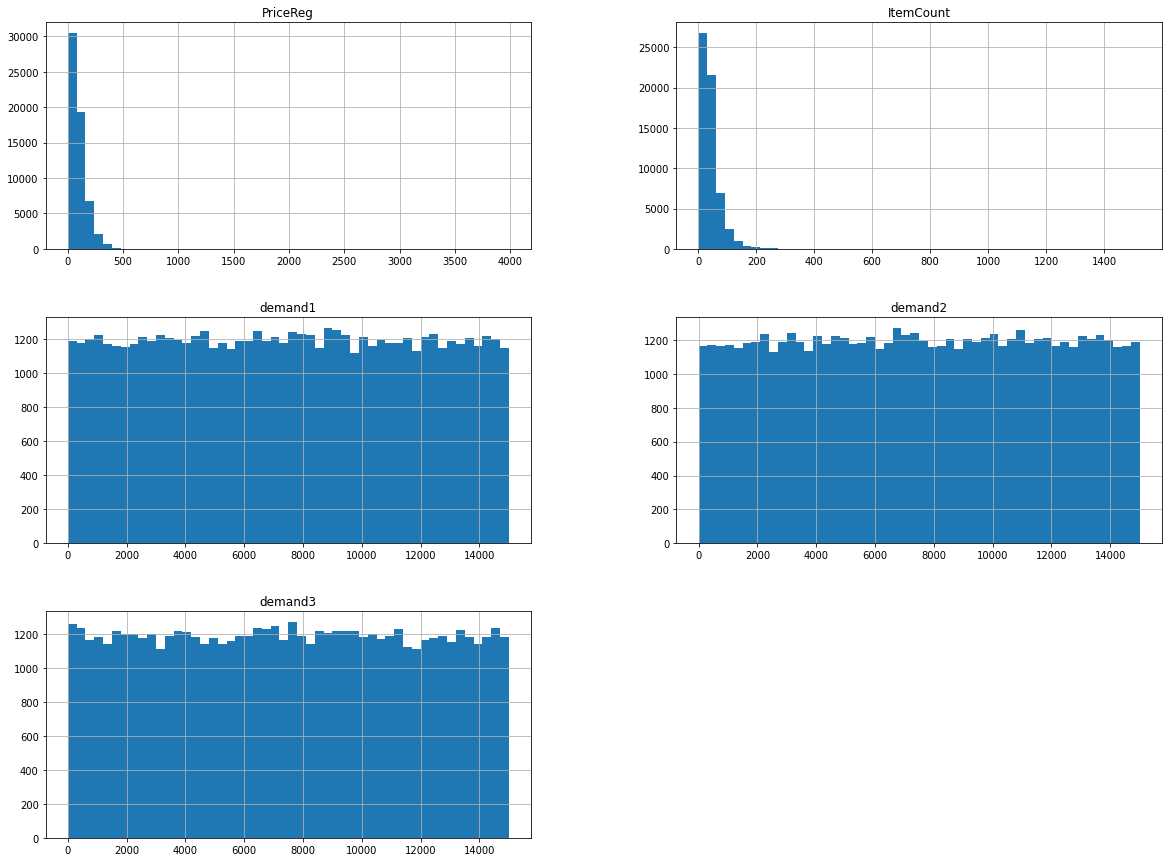

In [ ]:
train_df.hist(bins= 50, figsize = (20,15))
plt.show()

In [ ]:
train_df.describe()

,PriceReg,ItemCount,demand1,demand2,demand3
count,59615.000000,59615.000000,59615.000000,59615.000000,59615.000000
mean,100.557152,44.189784,7493.935385,7516.864296,7487.601560
std,79.114476,36.815083,4320.051000,4318.334016,4328.961666
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,49.990000,22.000000,3754.500000,3792.000000,3744.000000
50%,79.950000,34.000000,7506.000000,7501.000000,7494.000000
75%,129.000000,54.000000,11227.500000,11251.000000,11199.000000
max,3986.310000,1523.000000,14999.000000,14999.000000,14999.000000


Number of categories:  ['14' '3' '12' '6' '2' '5' '0' '11' '4' '10' '13' '9' '8' '1' '7']



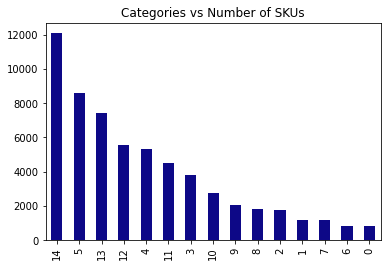

In [ ]:
categories = train_df.label.unique()
print('Number of categories: ', categories)
print()
train_df.label.value_counts().plot(kind='bar', title='Categories vs Number of SKUs', cmap='plasma')

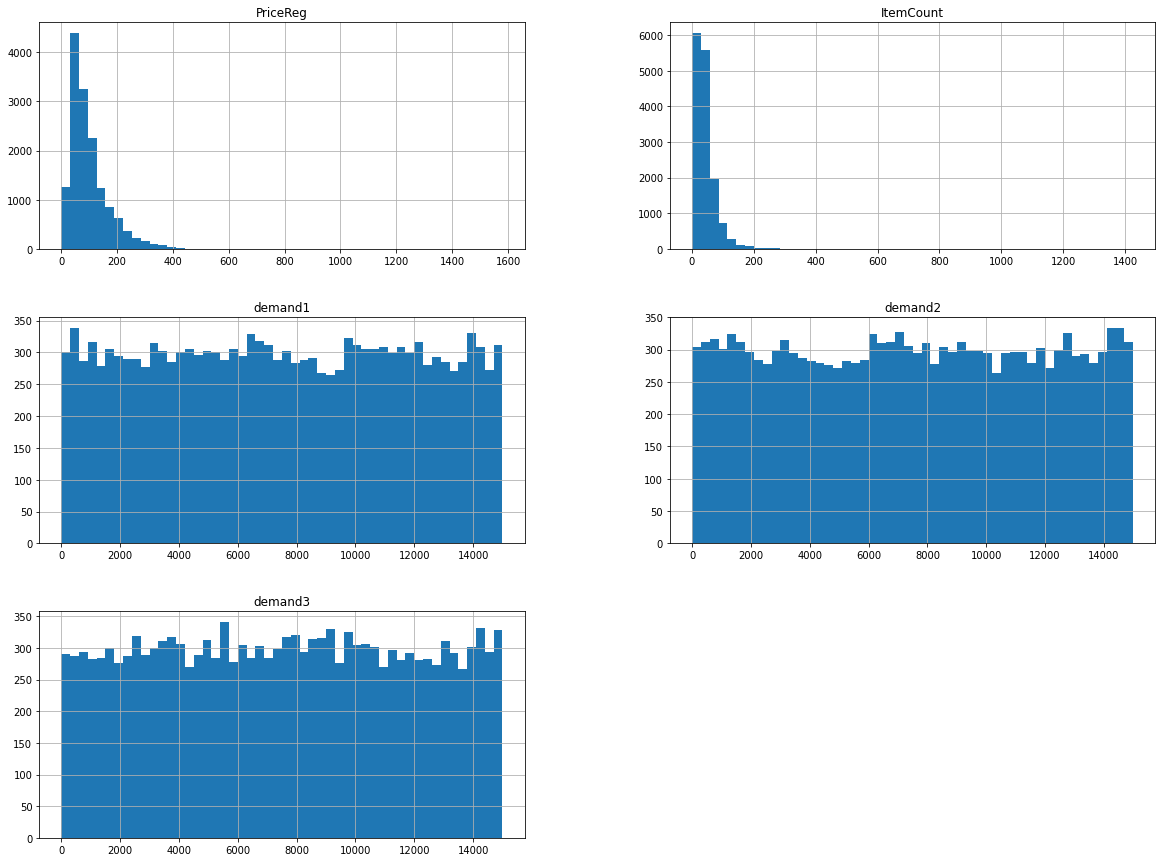

In [ ]:
test_df.hist(bins= 50, figsize = (20,15))
plt.show()

Number of categories:  ['10' '8' '5' '13' '3' '6' '4' '12' '2' '14' '1' '11' '7' '9' '0']



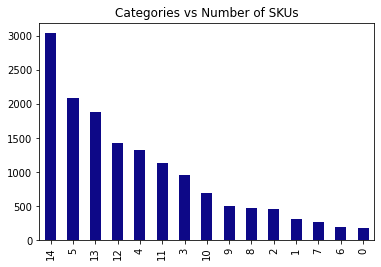

In [ ]:
categories = test_df.label.unique()
print('Number of categories: ', categories)
print()
test_df.label.value_counts().plot(kind='bar', title='Categories vs Number of SKUs', cmap='plasma')

In [ ]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(train_df, test_size= 0.2, random_state = 42)

In [ ]:
train_labels = np.array(train_df.pop('label'))
val_labels = np.array(val_df.pop('label'))
test_labels = np.array(test_df.pop('label'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [ ]:
train_features[0:3]

array([[   59.99,    28.  , 10169.  ,  3551.  , 12247.  ],
       [   48.54,    67.  , 14124.  , 11579.  ,  2755.  ],
       [  186.95,    68.  ,  8333.  ,  7182.  ,  7580.  ]])

In [ ]:
train_labels[0:3]

array(['14', '13', '3'], dtype=object)

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_val_labels = to_categorical(val_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
preprocessing_layer = tf.keras.layers.Normalization(axis = None)

In [ ]:
preprocessing_layer.adapt(train_features)

In [ ]:
inputs = tf.keras.Input(shape=(5))
x = preprocessing_layer(inputs)

In [ ]:
x[0:5]

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'tf.__operators__.getitem')>

In [ ]:
inputs.shape

TensorShape([None, 5])

In [ ]:
inputs.dtype

tf.float32

In [ ]:
# 1st layer
dense = tf.keras.layers.Dense(5, activation = 'relu')
x = dense(inputs)

In [ ]:
x = tf.keras.layers.Dense(2, activation = 'relu') (x)
outputs = tf.keras.layers.Dense(15, activation = 'softmax') (x)


In [ ]:
model1 = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'model1')

In [ ]:
model1.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 2)                 12        
                                                                 
 dense_2 (Dense)             (None, 15)                45        
                                                                 
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


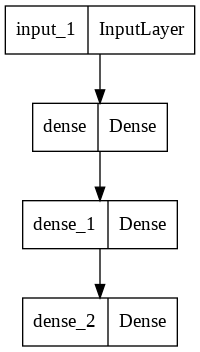

In [ ]:
tf.keras.utils.plot_model(model1, "my_first_model.png")


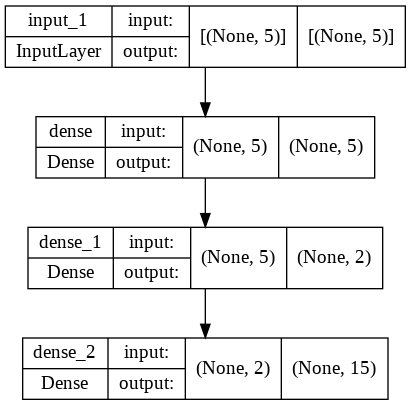

In [ ]:
tf.keras.utils.plot_model(model1, "my_first_model_with_shape_info.png", show_shapes=True)


In [ ]:
loss_function = tf.keras.losses.CategoricalCrossentropy()

In [ ]:
opt = tf.keras.optimizers.Adam()

In [ ]:
model1.compile(loss = loss_function, optimizer = opt, metrics= ['Precision', 'Recall','accuracy'])

In [ ]:
history1 = model1.fit(train_features,one_hot_train_labels, batch_size = 100, epochs = 50, validation_data = (val_features, one_hot_val_labels))

Epoch 1/50
477/477 [==============================] - 10s 16ms/step - loss: 3.6197 - precision: 0.4537 - recall: 0.0021 - accuracy: 0.2001 - val_loss: 2.5178 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.2031
Epoch 2/50
477/477 [==============================] - 4s 8ms/step - loss: 2.4727 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.2029 - val_loss: 2.4465 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.2031
Epoch 3/50
477/477 [==============================] - 2s 4ms/step - loss: 2.4283 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.2029 - val_loss: 2.4230 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.2031
Epoch 4/50
477/477 [==============================] - 2s 4ms/step - loss: 2.4140 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.2029 - val_loss: 2.4157 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.2031
Epoch 5/50
477/477 [==========================

In [ ]:
from sklearn.metrics import classification_report

y_pred = model1.predict(train_features, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_bool = np.argmax(one_hot_train_labels,axis = 1)

print(classification_report(y_bool, y_pred_bool))

746/746 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       636
           1       0.00      0.00      0.00       950
           2       0.00      0.00      0.00      1402
           3       0.00      0.00      0.00      3042
           4       0.00      0.00      0.00      4291
           5       0.00      0.00      0.00      6901
           6       0.00      0.00      0.00       666
           7       0.00      0.00      0.00       894
           8       0.00      0.00      0.00      1433
           9       0.00      0.00      0.00      1655
          10       0.00      0.00      0.00      2161
          11       0.00      0.00      0.00      3601
          12       0.00      0.00      0.00      4458
          13       0.00      0.00      0.00      5925
          14       0.20      1.00      0.34      9677

    accuracy                           0.20     47692
   macro avg       0.01  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import metrics

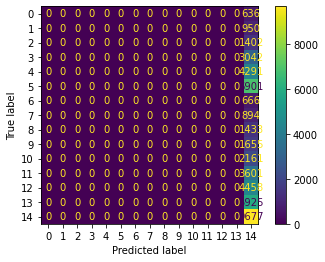

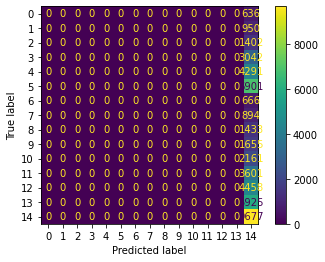

In [ ]:
cm_plot = metrics.ConfusionMatrixDisplay.from_predictions(y_bool, y_pred_bool).plot()

In [ ]:
inputs = tf.keras.Input(shape=(5))
x = preprocessing_layer(inputs)
dense = tf.keras.layers.Dense(5, activation = 'relu')
x = dense(x)
x = tf.keras.layers.Dense(2,activation = 'relu')(x)
outputs = tf.keras.layers.Dense(15, activation = 'softmax')(x)

In [ ]:
model2= tf.keras.Model(inputs = inputs, outputs = outputs, name = 'model2')

In [ ]:
model2.compile(loss = loss_function, optimizer = opt, metrics = ['Precision', 'Recall','accuracy'])

In [ ]:
history2 = model2.fit(train_features, one_hot_train_labels, batch_size = 100, epochs= 100, validation_data = (val_features, one_hot_val_labels))

Epoch 1/100
477/477 [==============================] - 15s 28ms/step - loss: 2.2706 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.2638 - val_loss: 1.9902 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.2995
Epoch 2/100
477/477 [==============================] - 3s 6ms/step - loss: 1.9061 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.3059 - val_loss: 1.8617 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.3047
Epoch 3/100
477/477 [==============================] - 4s 9ms/step - loss: 1.8325 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.3126 - val_loss: 1.8110 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.3237
Epoch 4/100
477/477 [==============================] - 6s 12ms/step - loss: 1.7876 - precision: 0.5278 - recall: 3.9839e-04 - accuracy: 0.3283 - val_loss: 1.7697 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.3307
Epoch 5/100
477/477 [================

In [ ]:
model2.summary()

Model: "model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 5)]               0         
                                                                 
 normalization (Normalizatio  (None, 5)                3         
 n)                                                              
                                                                 
 dense_9 (Dense)             (None, 5)                 30        
                                                                 
 dense_10 (Dense)            (None, 2)                 12        
                                                                 
 dense_11 (Dense)            (None, 15)                45        
                                                                 
Total params: 90
Trainable params: 87
Non-trainable params: 3
________________________________________________________________

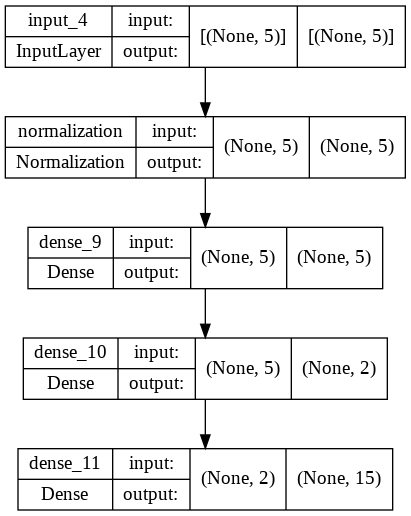

In [ ]:
tf.keras.utils.plot_model(model2, show_shapes=True)


<function matplotlib.pyplot.show>

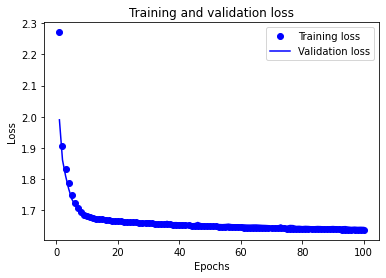

In [ ]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range (1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

In [ ]:
from keras import models
from keras import layers

model7= models.Sequential()

model7.add(layers.Dense(6, activation='relu'))
model7.add(layers.Dense(15, activation = 'relu'))
model7.add(layers.Dense(15, activation = 'softmax'))

In [ ]:
model7.compile(optimizer = opt, loss =loss_function,metrics=['Precision', 'Recall','accuracy'])

In [ ]:
history7 = model7.fit(train_features, one_hot_train_labels, batch_size = 100, epochs= 20, validation_data = (val_features, one_hot_val_labels))

Epoch 1/20
477/477 [==============================] - 5s 10ms/step - loss: 2.6376 - precision: 0.0551 - recall: 3.1452e-04 - accuracy: 0.1643 - val_loss: 2.4911 - val_precision: 0.0213 - val_recall: 8.3872e-05 - val_accuracy: 0.2032
Epoch 2/20
477/477 [==============================] - 1s 3ms/step - loss: 2.4548 - precision: 0.0068 - recall: 2.0968e-05 - accuracy: 0.2029 - val_loss: 2.4360 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.2031
Epoch 3/20
477/477 [==============================] - 2s 3ms/step - loss: 2.4261 - precision: 0.0087 - recall: 2.0968e-05 - accuracy: 0.2029 - val_loss: 2.4210 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.2031
Epoch 4/20
477/477 [==============================] - 4s 8ms/step - loss: 2.4155 - precision: 0.0127 - recall: 2.0968e-05 - accuracy: 0.2029 - val_loss: 2.4150 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.2031
Epoch 5/20
477/477 [==============================] - 2s 3m

In [ ]:
import keras
from keras.optimizers import  rmsprop_v2
def build_model(n_layer=1, n_neurons = 6, learning_rate = 3e-3, input_shape = [5]):
  model = models.Sequential()
  options= {"input_shape":input_shape}
  for layer in range(n_layer):
    model.add(layers.Dense(n_neurons, activation = "relu", **options))
    options = {}
  model.add(layers.Dense(15, **options))
  # optimizer = keras.optimizers.rmsprop(learning_rate)
  model.compile(loss = "categorical_crossentropy", optimizer = 'rmsprop')
  return model

In [ ]:
keras_reg= keras.wrappers.scikit_learn.KerasRegressor(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_distribs = {
    "n_layer":[1],
    "n_neurons":np.arange(1,515),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

In [ ]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter= 10, cv =3)
rnd_search_cv.fit(train_features, one_hot_train_labels, epochs = 20,validation_data =(val_features, one_hot_val_labels), callbacks = [keras.callbacks.EarlyStopping(patience = 10)])

Epoch 1/20
994/994 [==============================] - 7s 7ms/step - loss: 8.0066 - val_loss: 7.2304
Epoch 2/20
994/994 [==============================] - 3s 3ms/step - loss: 8.4726 - val_loss: 8.8213
Epoch 3/20
994/994 [==============================] - 6s 6ms/step - loss: 8.2073 - val_loss: 8.3162
Epoch 4/20
994/994 [==============================] - 3s 3ms/step - loss: 8.8527 - val_loss: 9.5214
Epoch 5/20
994/994 [==============================] - 4s 4ms/step - loss: 9.0316 - val_loss: 9.4750
Epoch 6/20
994/994 [==============================] - 4s 4ms/step - loss: 9.1332 - val_loss: 8.5812
Epoch 7/20
994/994 [==============================] - 3s 3ms/step - loss: 8.0514 - val_loss: 8.1141
Epoch 8/20
994/994 [==============================] - 5s 5ms/step - loss: 7.5097 - val_loss: 7.7191
Epoch 9/20
994/994 [==============================] - 5s 5ms/step - loss: 7.6144 - val_loss: 7.7191
Epoch 10/20
994/994 [==============================] - 3s 3ms/step - loss: 7.6144 - val_loss: 7.7191

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [         nan  -7.86001158  -8.19792541 -10.34264501  -9.99519952
  -9.03775152  -7.66431268  -8.73399353  -8.10503356  -8.68261305]
  category=UserWarning,


1491/1491 [==============================] - 5s 3ms/step - loss: 8.4629 - val_loss: 8.2598
Epoch 2/20
1491/1491 [==============================] - 3s 2ms/step - loss: 8.2828 - val_loss: 8.2598
Epoch 3/20
1491/1491 [==============================] - 7s 5ms/step - loss: 8.2828 - val_loss: 8.2598
Epoch 4/20
1491/1491 [==============================] - 6s 4ms/step - loss: 8.2828 - val_loss: 8.2598
Epoch 5/20
1491/1491 [==============================] - 6s 4ms/step - loss: 8.2828 - val_loss: 8.2598
Epoch 6/20
1491/1491 [==============================] - 6s 4ms/step - loss: 8.2828 - val_loss: 8.2598
Epoch 7/20
1491/1491 [==============================] - 5s 3ms/step - loss: 8.2828 - val_loss: 8.2598
Epoch 8/20
1491/1491 [==============================] - 5s 4ms/step - loss: 8.2828 - val_loss: 8.2598
Epoch 9/20
1491/1491 [==============================] - 3s 2ms/step - loss: 8.2828 - val_loss: 8.2598
Epoch 10/20
1491/1491 [==============================] - 5s 3ms/step - loss: 8.2828 - val_los

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f66a36fee50>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f66a45db110>,
                                        'n_layer': [1],
                                        'n_neurons': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,...
       417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429,
       430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
       443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
       456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
       469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481,
       482, 483, 484, 485, 486, 487, 488, 489,

In [ ]:
rnd_search_cv.best_params_

{'learning_rate': 0.0032411795457051255, 'n_layer': 1, 'n_neurons': 61}

In [ ]:
inputs = tf.keras.Input(shape=(5))
x = preprocessing_layer(inputs)
dense = tf.keras.layers.Dense(5, activation = 'relu')
x = dense(x)
x = tf.keras.layers.Dense(2,activation = 'relu')(x)
outputs = tf.keras.layers.Dense(15, activation = 'softmax')(x)

In [ ]:
inputs = tf.keras.Input(shape=(5))
x = preprocessing_layer(inputs)
x = tf.keras.layers.Dense(5, activation='relu') (x)
x = tf.keras.layers.Dense(61, activation = 'relu')(x)
outputs= tf.keras.layers.Dense(15, activation = 'softmax')(x)

In [ ]:
model3 = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'model3')

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0032411795457051255)
model3.compile(optimizer = opt, loss ='categorical_crossentropy',metrics=['Precision', 'Recall','accuracy'])

In [ ]:
history3 = model3.fit(train_features, one_hot_train_labels, batch_size = 100, epochs= 20, validation_data = (val_features, one_hot_val_labels))

Epoch 1/20
477/477 [==============================] - 7s 12ms/step - loss: 1.7028 - precision: 0.4879 - recall: 0.0258 - accuracy: 0.3515 - val_loss: 1.4249 - val_precision: 0.4865 - val_recall: 0.0528 - val_accuracy: 0.4097
Epoch 2/20
477/477 [==============================] - 62s 131ms/step - loss: 1.3269 - precision: 0.4823 - recall: 0.0855 - accuracy: 0.4271 - val_loss: 1.2870 - val_precision: 0.4675 - val_recall: 0.1571 - val_accuracy: 0.4409
Epoch 3/20
477/477 [==============================] - 3s 5ms/step - loss: 1.2470 - precision: 0.4814 - recall: 0.1038 - accuracy: 0.4369 - val_loss: 1.2289 - val_precision: 0.4870 - val_recall: 0.1462 - val_accuracy: 0.4393
Epoch 4/20
477/477 [==============================] - 4s 8ms/step - loss: 1.2189 - precision: 0.4860 - recall: 0.1046 - accuracy: 0.4430 - val_loss: 1.2068 - val_precision: 0.4760 - val_recall: 0.0963 - val_accuracy: 0.4490
Epoch 5/20
477/477 [==============================] - 3s 7ms/step - loss: 1.2072 - precision: 0.4780

In [ ]:
model3.summary()

Model: "model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 5)]               0         
                                                                 
 normalization (Normalizatio  (None, 5)                3         
 n)                                                              
                                                                 
 dense_80 (Dense)            (None, 5)                 30        
                                                                 
 dense_81 (Dense)            (None, 61)                366       
                                                                 
 dense_82 (Dense)            (None, 15)                930       
                                                                 
Total params: 1,329
Trainable params: 1,326
Non-trainable params: 3
__________________________________________________________

In [ ]:
history3 = model3.fit(train_features, one_hot_train_labels, batch_size = 100, epochs= 100, validation_data = (val_features, one_hot_val_labels))

Epoch 1/100
477/477 [==============================] - 4s 7ms/step - loss: 1.1635 - precision: 0.4813 - recall: 0.1333 - accuracy: 0.4536 - val_loss: 1.1657 - val_precision: 0.4943 - val_recall: 0.0439 - val_accuracy: 0.4516
Epoch 2/100
477/477 [==============================] - 3s 6ms/step - loss: 1.1602 - precision: 0.4895 - recall: 0.1319 - accuracy: 0.4540 - val_loss: 1.1727 - val_precision: 0.4723 - val_recall: 0.1988 - val_accuracy: 0.4522
Epoch 3/100
477/477 [==============================] - 4s 8ms/step - loss: 1.1594 - precision: 0.4847 - recall: 0.1390 - accuracy: 0.4542 - val_loss: 1.1789 - val_precision: 0.4750 - val_recall: 0.2199 - val_accuracy: 0.4453
Epoch 4/100
477/477 [==============================] - 2s 3ms/step - loss: 1.1600 - precision: 0.4864 - recall: 0.1392 - accuracy: 0.4552 - val_loss: 1.1647 - val_precision: 0.4429 - val_recall: 0.0208 - val_accuracy: 0.4394
Epoch 5/100
477/477 [==============================] - 2s 5ms/step - loss: 1.1598 - precision: 0.480

In [ ]:
y_pred = model3.predict(train_features, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_bool = np.argmax(one_hot_train_labels,axis = 1)

print(classification_report(y_bool, y_pred_bool))

746/746 [==============================] - 4s 5ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       636
           1       0.00      0.00      0.00       950
           2       0.00      0.00      0.00      1402
           3       0.00      0.00      0.00      3042
           4       0.00      0.00      0.00      4291
           5       0.00      0.00      0.00      6901
           6       0.00      0.00      0.00       666
           7       0.00      0.00      0.00       894
           8       0.00      0.00      0.00      1433
           9       0.00      0.00      0.00      1655
          10       0.00      0.00      0.00      2161
          11       0.08      1.00      0.14      3601
          12       0.00      0.00      0.00      4458
          13       0.00      0.00      0.00      5925
          14       0.00      0.00      0.00      9677

    accuracy                           0.08     47692
   macro avg       0.01  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


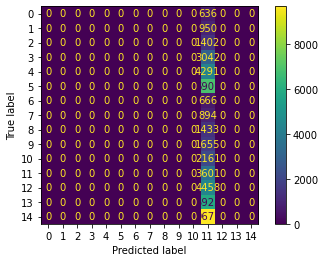

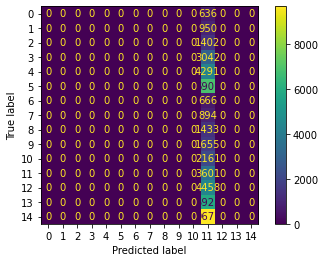

In [ ]:
cm_plot = metrics.ConfusionMatrixDisplay.from_predictions(y_bool, y_pred_bool).plot()

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(y_bool),y =  y_bool)
d_class_weights = dict(enumerate(class_weights))

In [ ]:
# data normalization on train features
mean = train_features.mean(axis=0)
train_features -= mean 
std = train_features.std(axis=0)
train_features /= std

In [ ]:
test_features -=mean
test_features /=std
test_features[1]

array([-0.50859499, -0.5445843 ,  0.1442745 , -0.84256401, -0.03636087])

In [ ]:
val_features -=mean
val_features /=std
val_features[1]

array([-0.23556299, -0.81535884, -1.23873739, -1.08438084,  0.43159055])

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(5, activation = 'relu'))
model.add(layers.Dense(61, activation= 'relu'))
model.add(layers.Dense(15, activation = 'softmax'))

In [ ]:
# compile the model with optimizer and loss function
model.compile(optimizer = opt, loss =loss_function,metrics=['Precision','Recall','Accuracy'])

In [ ]:
history8 = model.fit(train_features,one_hot_train_labels,epochs=20, batch_size=64, 
                     validation_data=(val_features, one_hot_val_labels), class_weight = d_class_weights)



Epoch 1/20
746/746 [==============================] - 8s 8ms/step - loss: 0.9012 - precision: 0.7426 - recall: 0.5257 - Accuracy: 0.6453 - val_loss: 0.6713 - val_precision: 0.7895 - val_recall: 0.6927 - val_Accuracy: 0.7493
Epoch 2/20
746/746 [==============================] - 5s 7ms/step - loss: 0.5700 - precision: 0.8105 - recall: 0.7341 - Accuracy: 0.7767 - val_loss: 0.5791 - val_precision: 0.8116 - val_recall: 0.7502 - val_Accuracy: 0.7809
Epoch 3/20
746/746 [==============================] - 5s 6ms/step - loss: 0.5212 - precision: 0.8178 - recall: 0.7648 - Accuracy: 0.7926 - val_loss: 0.5447 - val_precision: 0.8182 - val_recall: 0.7699 - val_Accuracy: 0.7944
Epoch 4/20
746/746 [==============================] - 5s 7ms/step - loss: 0.5029 - precision: 0.8205 - recall: 0.7747 - Accuracy: 0.7978 - val_loss: 0.5086 - val_precision: 0.8222 - val_recall: 0.7798 - val_Accuracy: 0.8015
Epoch 5/20
746/746 [==============================] - 5s 7ms/step - loss: 0.4895 - precision: 0.8235 - r

In [ ]:
history8 = model.fit(train_features,one_hot_train_labels,epochs=20, batch_size=64, 
                     validation_data=(val_features, one_hot_val_labels), class_weight = d_class_weights)




Epoch 1/20
746/746 [==============================] - 2s 3ms/step - loss: 0.4343 - precision: 0.8366 - recall: 0.8112 - Accuracy: 0.8240 - val_loss: 0.4477 - val_precision: 0.8343 - val_recall: 0.8106 - val_Accuracy: 0.8235
Epoch 2/20
746/746 [==============================] - 3s 3ms/step - loss: 0.4356 - precision: 0.8358 - recall: 0.8124 - Accuracy: 0.8239 - val_loss: 0.4646 - val_precision: 0.8289 - val_recall: 0.8048 - val_Accuracy: 0.8182
Epoch 3/20
746/746 [==============================] - 3s 4ms/step - loss: 0.4349 - precision: 0.8353 - recall: 0.8109 - Accuracy: 0.8224 - val_loss: 0.4919 - val_precision: 0.8216 - val_recall: 0.7995 - val_Accuracy: 0.8099
Epoch 4/20
746/746 [==============================] - 2s 3ms/step - loss: 0.4315 - precision: 0.8359 - recall: 0.8121 - Accuracy: 0.8241 - val_loss: 0.4496 - val_precision: 0.8327 - val_recall: 0.8102 - val_Accuracy: 0.8213
Epoch 5/20
746/746 [==============================] - 2s 3ms/step - loss: 0.4320 - precision: 0.8372 - r

In [ ]:
from keras import models
from keras import layers

model5 = models.Sequential()

model5.add(layers.Dense(5, activation = 'relu'))
model5.add(layers.Dense(61, activation= 'relu'))
model5.add(layers.Dense(15, activation = 'softmax'))

In [ ]:
opti = tf.keras.optimizers.RMSprop(learning_rate=0.0032411795457051255)

model5.compile(optimizer = opti, loss =loss_function,metrics=['Precision','Recall','Accuracy'])

In [ ]:
history5 = model5.fit(train_features,one_hot_train_labels,epochs=20, batch_size=64, 
                     validation_data=(val_features, one_hot_val_labels), class_weight = d_class_weights)



Epoch 1/20
746/746 [==============================] - 9s 9ms/step - loss: 1.2972 - precision: 0.6465 - recall: 0.2399 - Accuracy: 0.4592 - val_loss: 1.1457 - val_precision: 0.6343 - val_recall: 0.3972 - val_Accuracy: 0.5390
Epoch 2/20
746/746 [==============================] - 3s 4ms/step - loss: 0.9514 - precision: 0.6405 - recall: 0.4325 - Accuracy: 0.5553 - val_loss: 1.0574 - val_precision: 0.6433 - val_recall: 0.4634 - val_Accuracy: 0.5693
Epoch 3/20
746/746 [==============================] - 3s 3ms/step - loss: 0.8836 - precision: 0.6456 - recall: 0.4772 - Accuracy: 0.5808 - val_loss: 1.0548 - val_precision: 0.6286 - val_recall: 0.4759 - val_Accuracy: 0.5745
Epoch 4/20
746/746 [==============================] - 2s 3ms/step - loss: 0.8486 - precision: 0.6484 - recall: 0.5022 - Accuracy: 0.5923 - val_loss: 0.9950 - val_precision: 0.6566 - val_recall: 0.5090 - val_Accuracy: 0.5999
Epoch 5/20
746/746 [==============================] - 2s 3ms/step - loss: 0.8253 - precision: 0.6515 - r

In [ ]:
from sklearn.metrics import classification_report

y_pred = model5.predict(train_features, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_bool = np.argmax(one_hot_train_labels,axis = 1)

print(classification_report(y_bool, y_pred_bool))

746/746 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       636
           1       0.88      0.65      0.75       950
           2       0.73      0.88      0.80      1402
           3       0.74      0.83      0.78      3042
           4       0.75      0.80      0.78      4291
           5       0.80      0.76      0.78      6901
           6       0.36      0.56      0.44       666
           7       0.30      0.88      0.44       894
           8       0.30      0.84      0.45      1433
           9       0.66      0.92      0.77      1655
          10       0.63      0.90      0.74      2161
          11       0.72      0.85      0.78      3601
          12       0.79      0.57      0.66      4458
          13       0.85      0.42      0.56      5925
          14       0.80      0.54      0.65      9677

    accuracy                           0.69     47692
   macro avg       0.67  

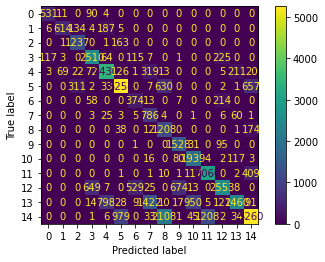

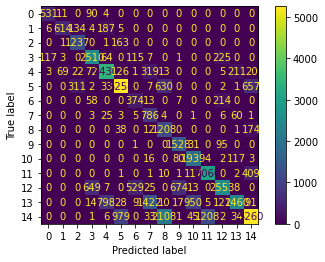

In [ ]:
cm_plot = metrics.ConfusionMatrixDisplay.from_predictions(y_bool, y_pred_bool).plot()

In [ ]:
test_predictions_baseline = model.predict(test_features, batch_size = 64)

In [ ]:
test_pred = np.argmax(test_predictions_baseline, axis= 1)
test = np.argmax(one_hot_test_labels, axis = 1)

In [ ]:
baseline_results = model.evaluate(test_features, one_hot_test_labels,
                                  batch_size=64, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()


loss :  0.47406071424484253
precision :  0.8312615752220154
recall :  0.8121309876441956
Accuracy :  0.8213231563568115



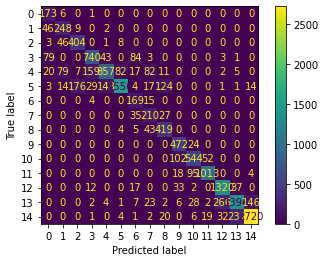

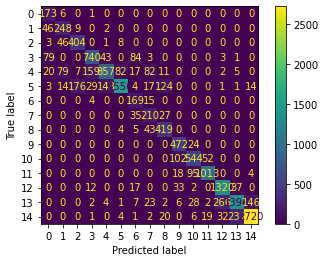

In [ ]:
from sklearn import metrics

cm_plot = metrics.ConfusionMatrixDisplay.from_predictions(test, test_pred).plot()